In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from matplotlib.patches import ConnectionPatch
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import auc
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from scipy.stats import mode

In [6]:
df_train = pd.read_csv('C:\\Users\\RAIDER\\Documents\\2025-11-06-testCode\\train.csv')
df_test  = pd.read_csv('C:\\Users\\RAIDER\\Documents\\2025-11-06-testCode\\test.csv')
df_sub = pd.read_csv('C:\\Users\\RAIDER\\Documents\\2025-11-06-testCode\\sample_submission.csv')

In [7]:
df_train.head()

id  Marital status  Application mode  Application order  Course  \
0   0               1                 1                  1    9238   
1   1               1                17                  1    9238   
2   2               1                17                  2    9254   
3   3               1                 1                  3    9500   
4   4               1                 1                  2    9500   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           126.0            1                       1  ...   
1                           125.0            1                      19  ...   
2                           137.0            1                       3  ...   
3                           131.0            1                      19  ...   
4                           132.0            1                      19  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    6   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    8   
4                                    0                                    7   

   Curricular units 2nd sem (evaluations)  \
0                                       7   
1                                       9   
2                                       0   
3                                      11   
4                                      12   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    6                         12.428571   
1                                    0                          0.000000   
2                                    0                          0.000000   
3                                    7                         12.820000   
4                                    6                         12.933333   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               11.1   
1                                               0               11.1   
2                                               0               16.2   
3                                               0               11.1   
4                                               0                7.6   

   Inflation rate   GDP    Target  
0             0.6  2.02  Graduate  
1             0.6  2.02   Dropout  
2             0.3 -0.92   Dropout  
3             0.6  2.02  Enrolled  
4             2.6  0.32  Graduate  

[5 rows x 38 columns]

In [8]:
df_train.describe()

id  Marital status  Application mode  Application order  \
count  76518.000000    76518.000000      76518.000000       76518.000000   
mean   38258.500000        1.111934         16.054419           1.644410   
std    22088.988286        0.441669         16.682337           1.229645   
min        0.000000        1.000000          1.000000           0.000000   
25%    19129.250000        1.000000          1.000000           1.000000   
50%    38258.500000        1.000000         17.000000           1.000000   
75%    57387.750000        1.000000         39.000000           2.000000   
max    76517.000000        6.000000         53.000000           9.000000   

             Course  Daytime/evening attendance  Previous qualification  \
count  76518.000000                76518.000000            76518.000000   
mean    9001.286377                    0.915314                3.658760   
std     1803.438531                    0.278416                8.623774   
min       33.000000                    0.000000                1.000000   
25%     9119.000000                    1.000000                1.000000   
50%     9254.000000                    1.000000                1.000000   
75%     9670.000000                    1.000000                1.000000   
max     9991.000000                    1.000000               43.000000   

       Previous qualification (grade)   Nacionality  Mother's qualification  \
count                    76518.000000  76518.000000            76518.000000   
mean                       132.378766      1.226600               19.837633   
std                         10.995328      3.392183               15.399456   
min                         95.000000      1.000000                1.000000   
25%                        125.000000      1.000000                1.000000   
50%                        133.100000      1.000000               19.000000   
75%                        140.000000      1.000000               37.000000   
max                        190.000000    109.000000               44.000000   

       ...  Curricular units 1st sem (without evaluations)  \
count  ...                                     76518.00000   
mean   ...                                         0.05796   
std    ...                                         0.40849   
min    ...                                         0.00000   
25%    ...                                         0.00000   
50%    ...                                         0.00000   
75%    ...                                         0.00000   
max    ...                                        12.00000   

       Curricular units 2nd sem (credited)  \
count                         76518.000000   
mean                              0.137053   
std                               0.933830   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                         76518.000000   
mean                              5.933414   
std                               1.627182   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               6.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                            76518.000000   
mean                                 7.234468   
std                                  3.503040   
min                                  0.000000   
25%                                  6.000000   
50%                                  7.000000   
75%                                  9.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
count                         765

In [9]:
df_test.head()

id  Marital status  Application mode  Application order  Course  \
0  76518               1                 1                  1    9500   
1  76519               1                 1                  1    9238   
2  76520               1                 1                  1    9238   
3  76521               1                44                  1    9147   
4  76522               1                39                  1    9670   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                      39   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           141.0            1                       3  ...   
1                           128.0            1                       1  ...   
2                           118.0            1                       1  ...   
3                           130.0            1                       1  ...   
4                           110.0            1                       1  ...   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    8   
1                                    0                                    6   
2                                    0                                    6   
3                                    3                                    8   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                      11   
3                                      14   
4                                       9   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.500000   
2                                    5                         11.000000   
3                                    5                         11.000000   
4                                    4                         10.666667   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               13.9   
1                                               0               11.1   
2                                               0               15.5   
3                                               0                8.9   
4                                               2                7.6   

   Inflation rate   GDP  
0            -0.3  0.79  
1             0.6  2.02  
2             2.8 -4.06  
3             1.4  3.51  
4             2.6  0.32  

[5 rows x 37 columns]

In [10]:
df_sub.head()

id    Target
0  76518  Graduate
1  76519  Graduate
2  76520  Graduate
3  76521  Graduate
4  76522  Graduate

In [11]:
missing_values = df_train.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


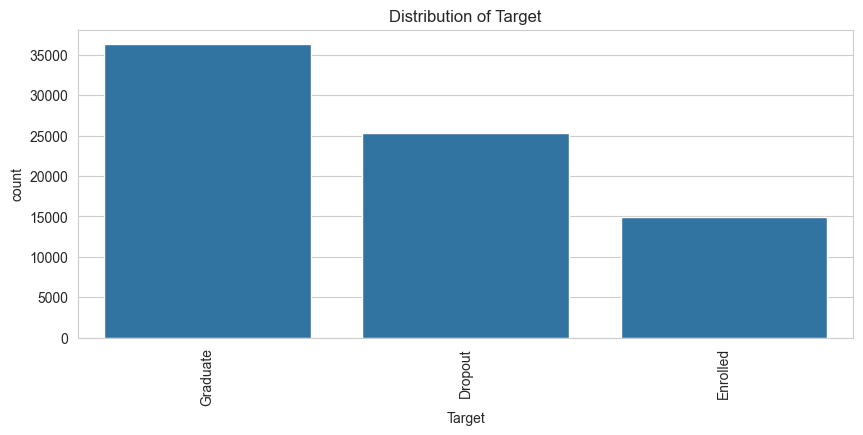

In [12]:
categorical_columns = df_train.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=df_train)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

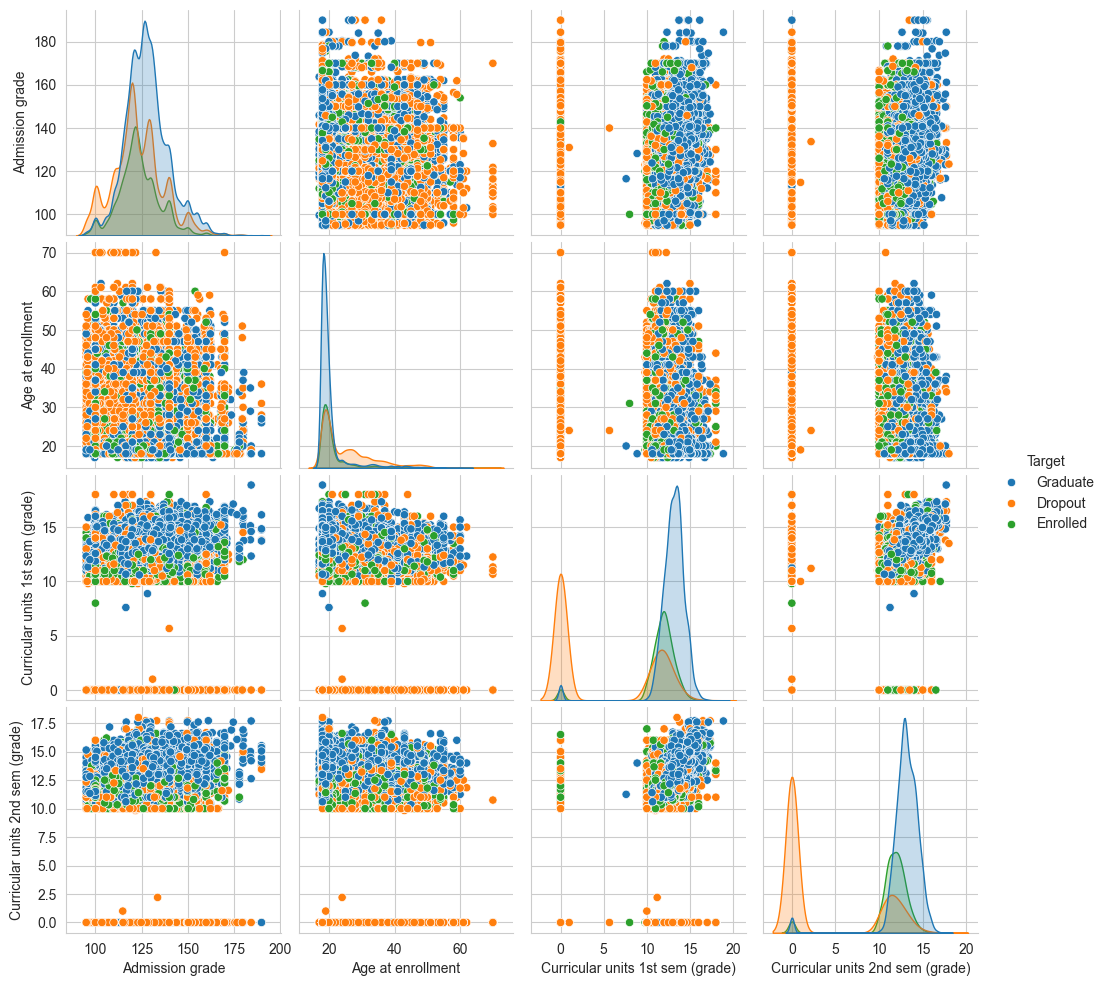

In [13]:
selected_features = ['Admission grade', 'Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Target']
sns.pairplot(df_train[selected_features], hue='Target')
plt.show()

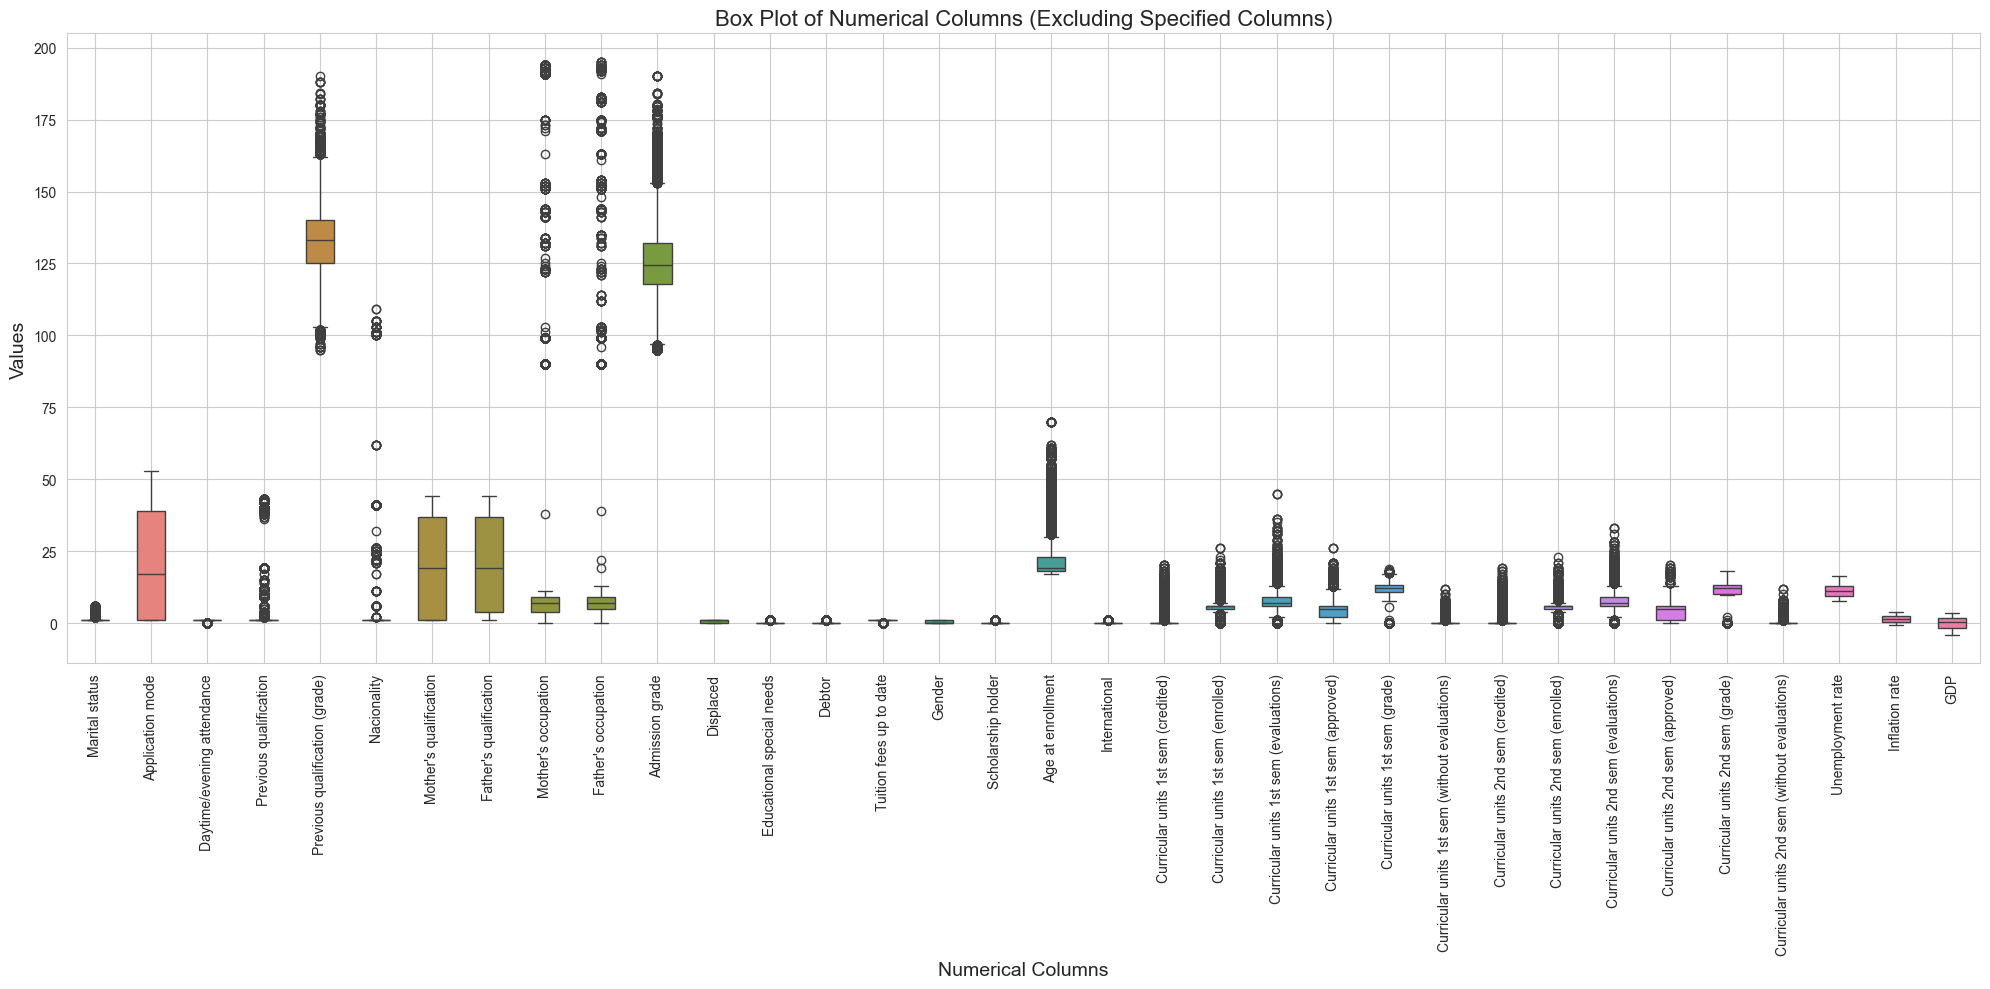

In [14]:
exclude_columns = ['id', 'Application order', 'Course']
numerical_cols = df_train.select_dtypes(include=['number']).drop(columns=exclude_columns).columns
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_train[numerical_cols], orient='v', width=0.5)
plt.title('Box Plot of Numerical Columns (Excluding Specified Columns)', fontsize=16)
plt.xlabel('Numerical Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

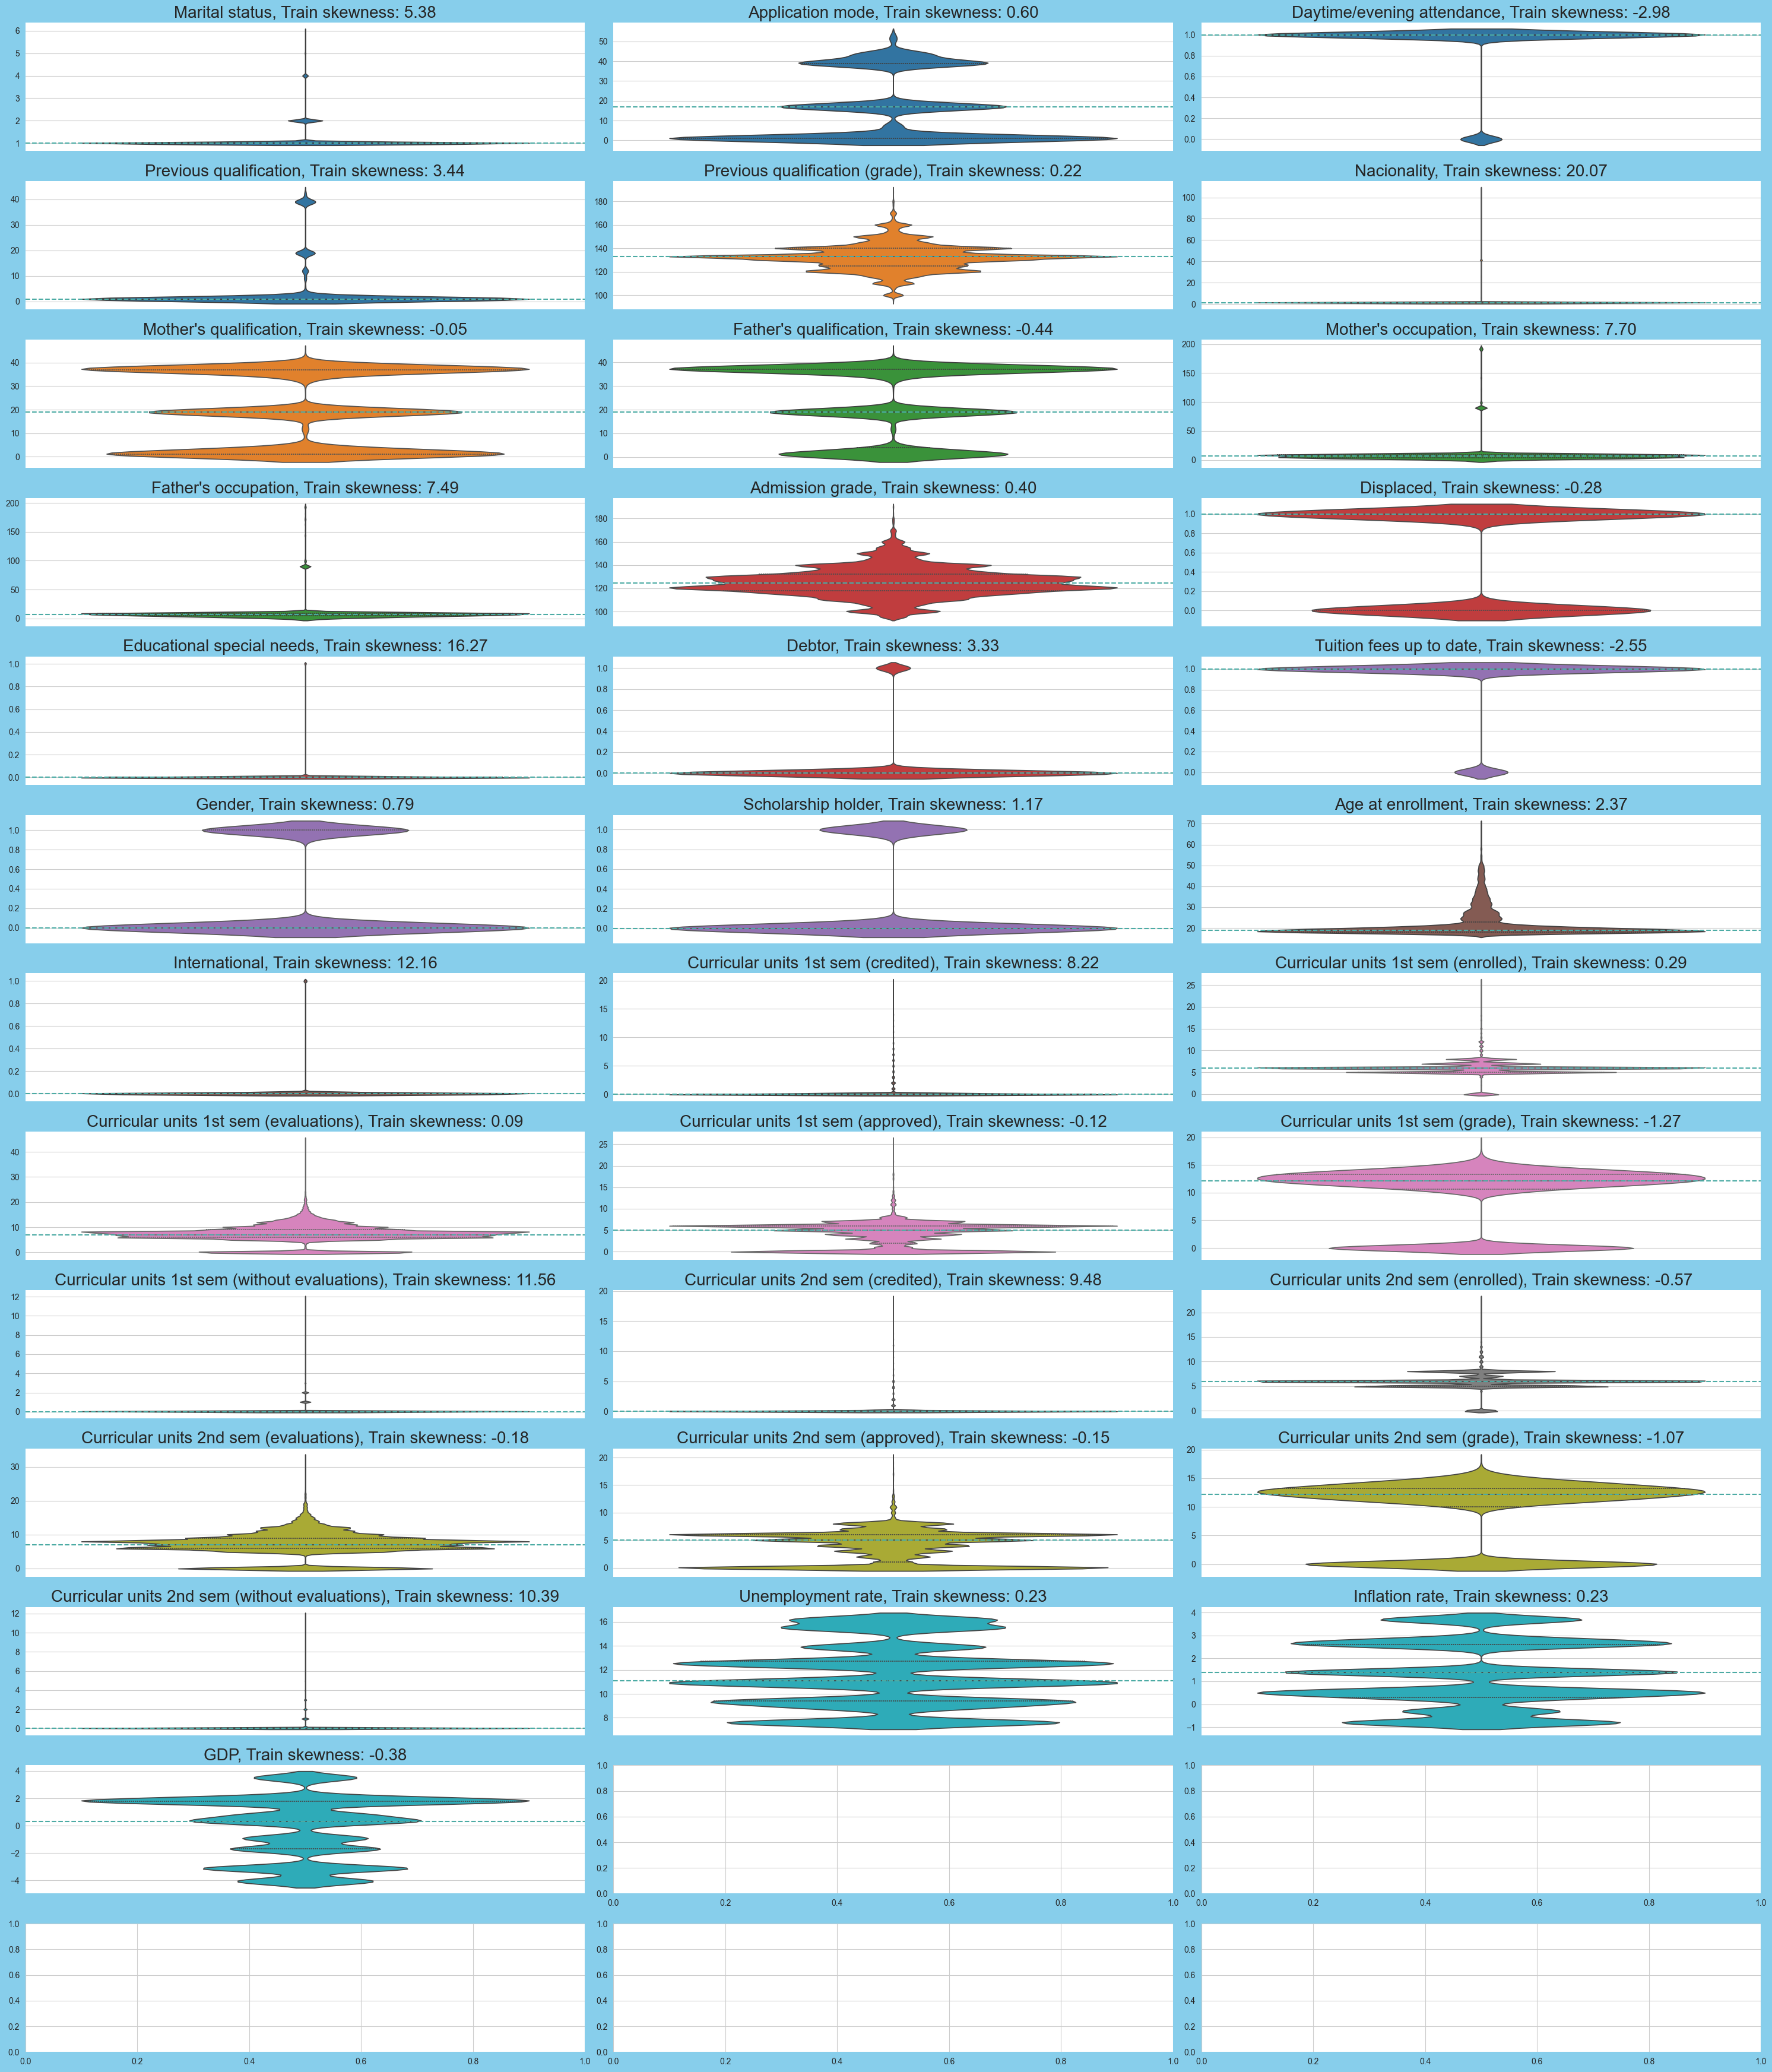

In [15]:
def violin_plot(train_dataset, columns_list, rows, cols):
    import matplotlib.cm as cm
    from itertools import cycle

    columns_list = [col for col in columns_list if col != 'id']
    fig, axs = plt.subplots(rows, cols, figsize=(30, 35))
    fig.subplots_adjust(hspace=2, top=0.4)

    colors = cycle(cm.tab10(np.linspace(0, 1, len(columns_list))))

    for i, col in enumerate(columns_list):
        color = next(colors)
        sns.violinplot(y=train_dataset[col], ax=axs[i // cols, i % cols], color=color, inner='quartile')
        axs[i // cols, i % cols].set_title(f'{col}, Train skewness: {train_dataset[col].skew():.2f}', fontsize=20)
        axs[i // cols, i % cols].set_xlabel('')
        axs[i // cols, i % cols].set_ylabel('')
        axs[i // cols, i % cols].tick_params(axis='both', which='major', labelsize=10)
        median_train = train_dataset[col].median()
        axs[i // cols, i % cols].axhline(y=median_train, color='#4caba4', linestyle='--')

    #fig.suptitle('Violin Plot of Numeric Columns', fontsize=36)
    plt.tight_layout()
    plt.gcf().set_facecolor('skyblue')
    sns.despine(left=True, bottom=True)

violin_plot(train_dataset=df_train, columns_list=numerical_cols, rows=13, cols=3)

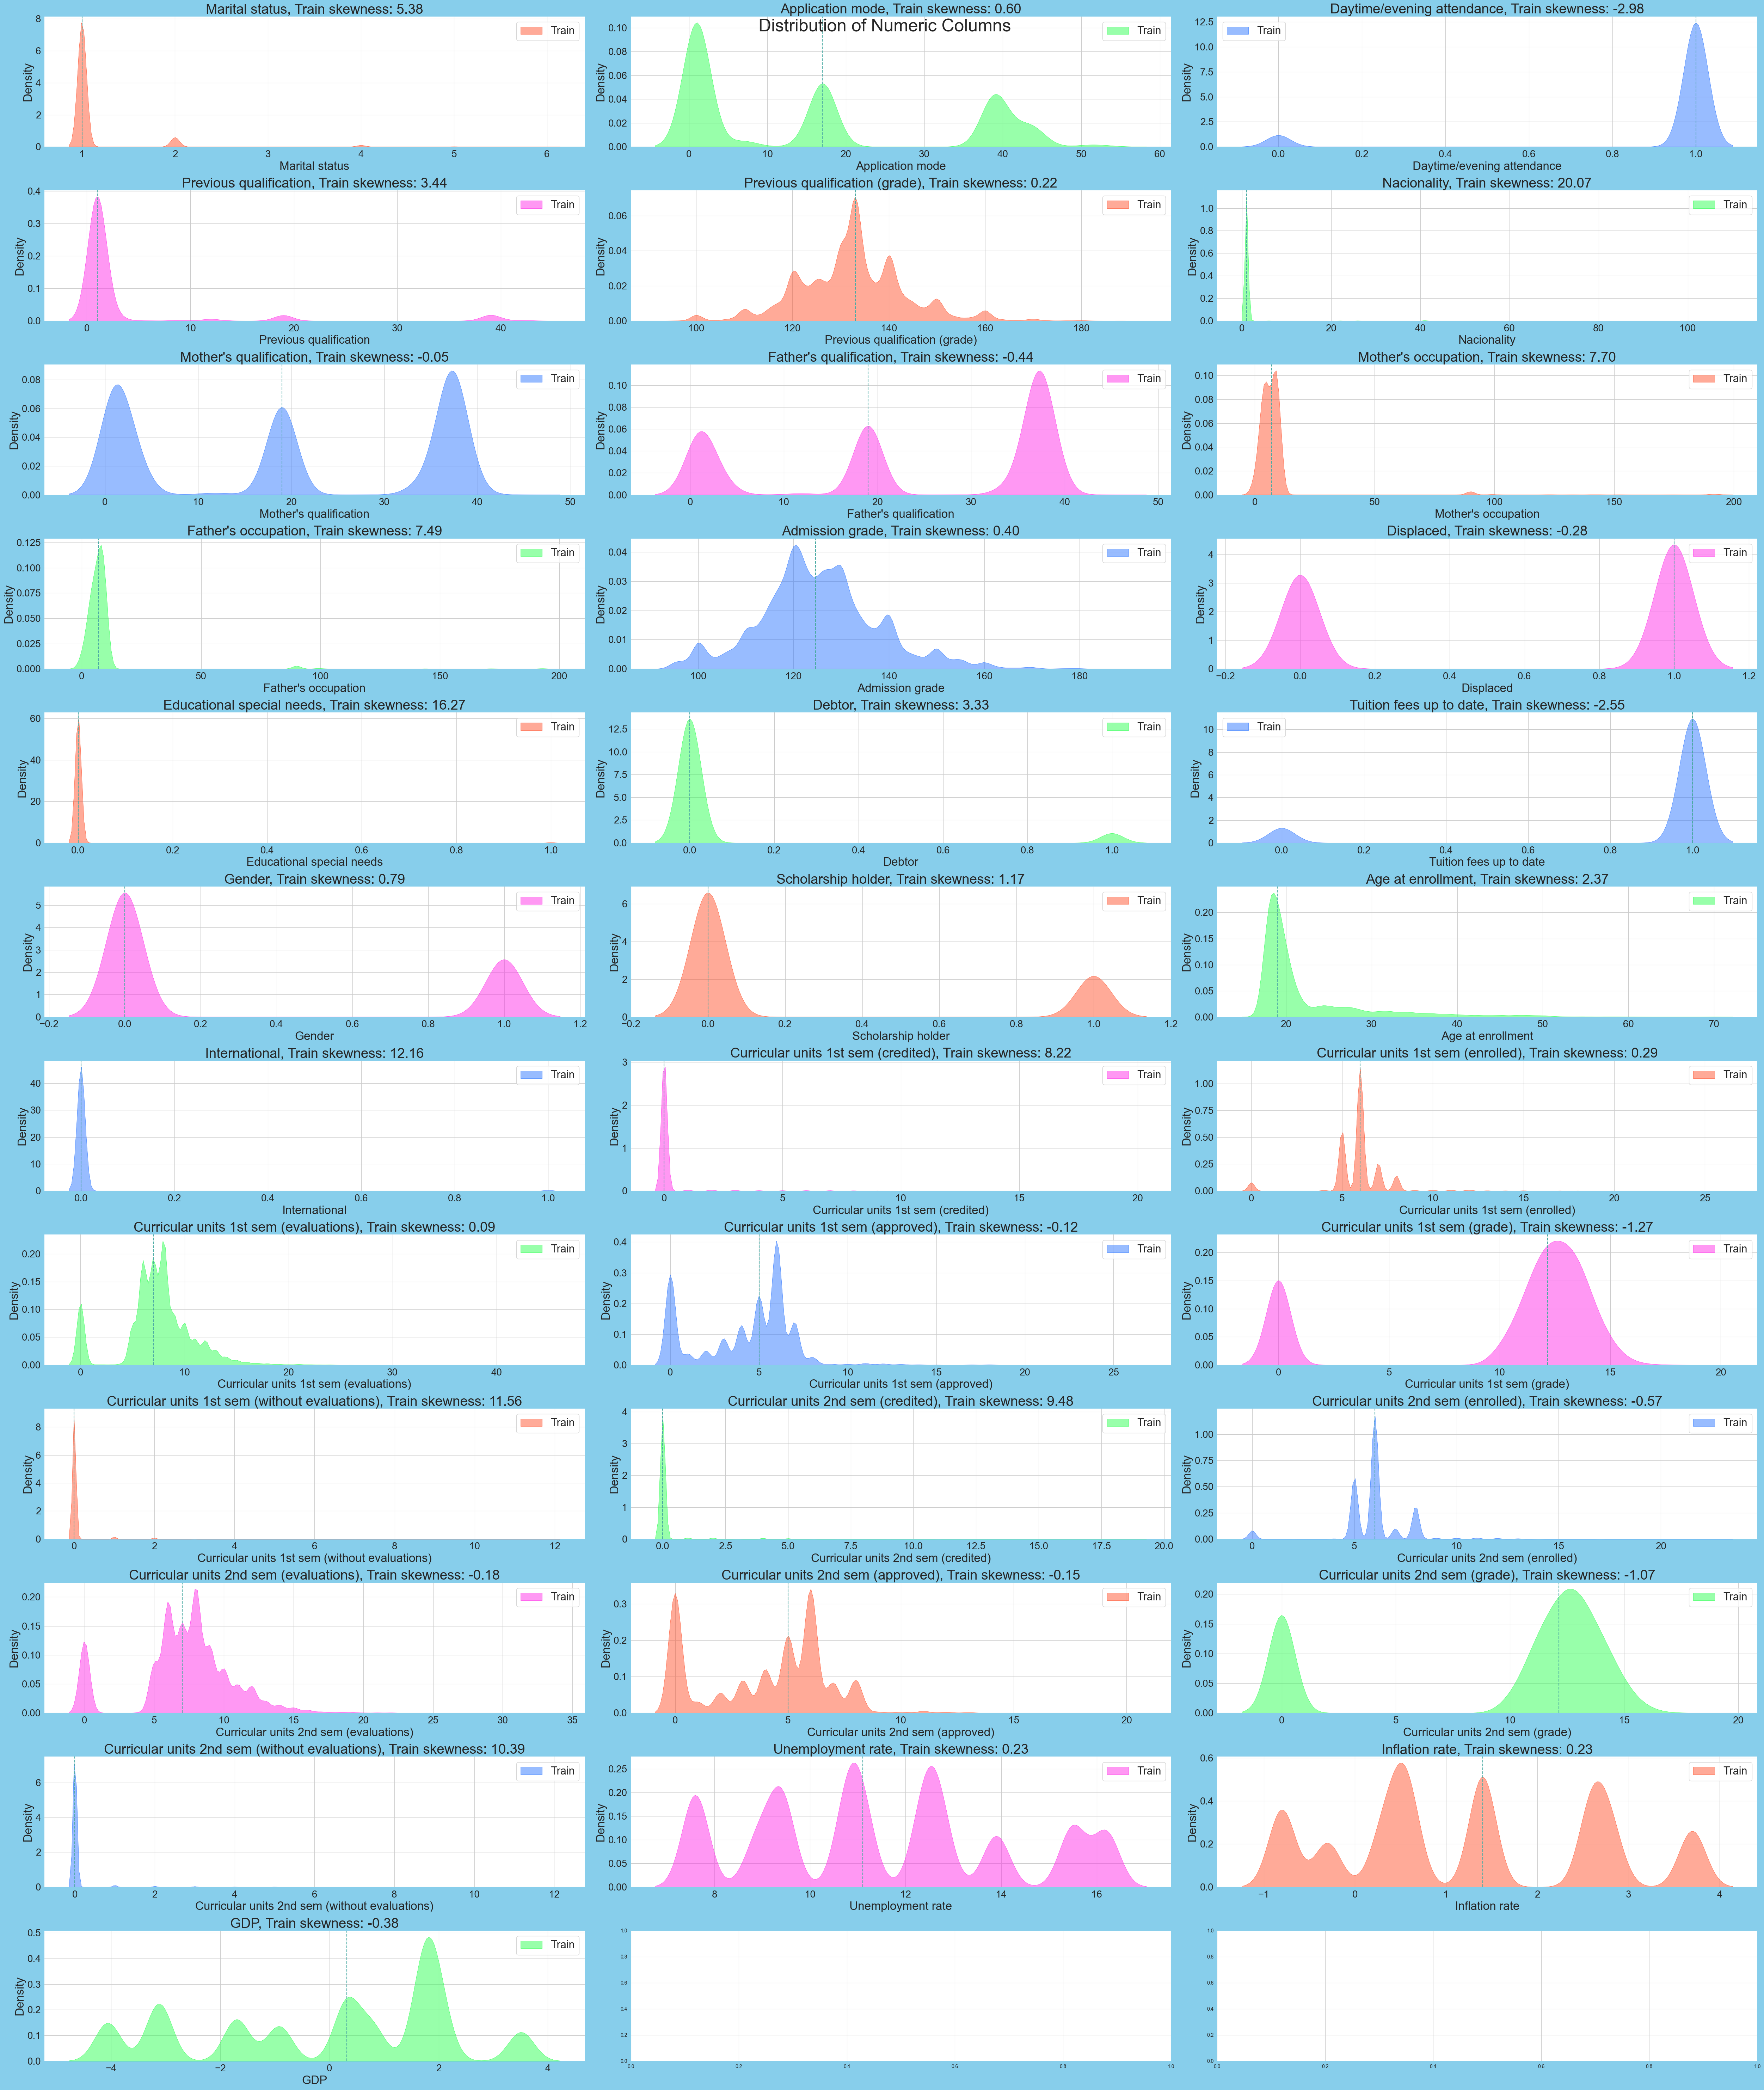

In [16]:
def dist(train_dataset, columns_list, rows, cols):
    columns_list = [col for col in columns_list if col != 'id']
    fig, axs = plt.subplots(rows, cols, figsize=(50, 60))
    fig.subplots_adjust(hspace=1, wspace=1)

    colors = ['#FF5733', '#33FF57', '#337AFF', '#FF33E9', '#FF5733', '#33FF57', '#337AFF', '#FF33E9', '#FF5733', '#33FF57', '#337AFF', '#FF33E9', '#FF5733', '#33FF57', '#337AFF', '#FF33E9', '#FF5733', '#33FF57', '#337AFF', '#FF33E9', '#FF5733', '#33FF57', '#337AFF', '#FF33E9', '#FF5733', '#33FF57', '#337AFF', '#FF33E9', '#FF5733', '#33FF57', '#337AFF', '#FF33E9', '#FF5733', '#33FF57', '#337AFF', '#FF33E9']

    for i, col in enumerate(columns_list):
        sns.kdeplot(train_dataset[col], ax=axs[i // cols, i % cols], fill=True, alpha=0.5, linewidth=0.5, color=colors[i], label='Train')
        axs[i // cols, i % cols].set_title(f'{col}, Train skewness: {train_dataset[col].skew():.2f}', fontsize=28)
        axs[i // cols, i % cols].set_xlabel(col, fontsize=24)
        axs[i // cols, i % cols].set_ylabel('Density', fontsize=24)
        axs[i // cols, i % cols].legend(fontsize=22)
        axs[i // cols, i % cols].tick_params(axis='both', which='major', labelsize=20)
        median_train = train_dataset[col].median()
        axs[i // cols, i % cols].axvline(x=median_train, color='#4caba4', linestyle='--')

    fig.suptitle('Distribution of Numeric Columns', fontsize=36)
    plt.tight_layout()
    plt.gcf().set_facecolor('skyblue')
    sns.despine(left=True, bottom=True)

dist(train_dataset=df_train, columns_list=numerical_cols, rows=12, cols=3)

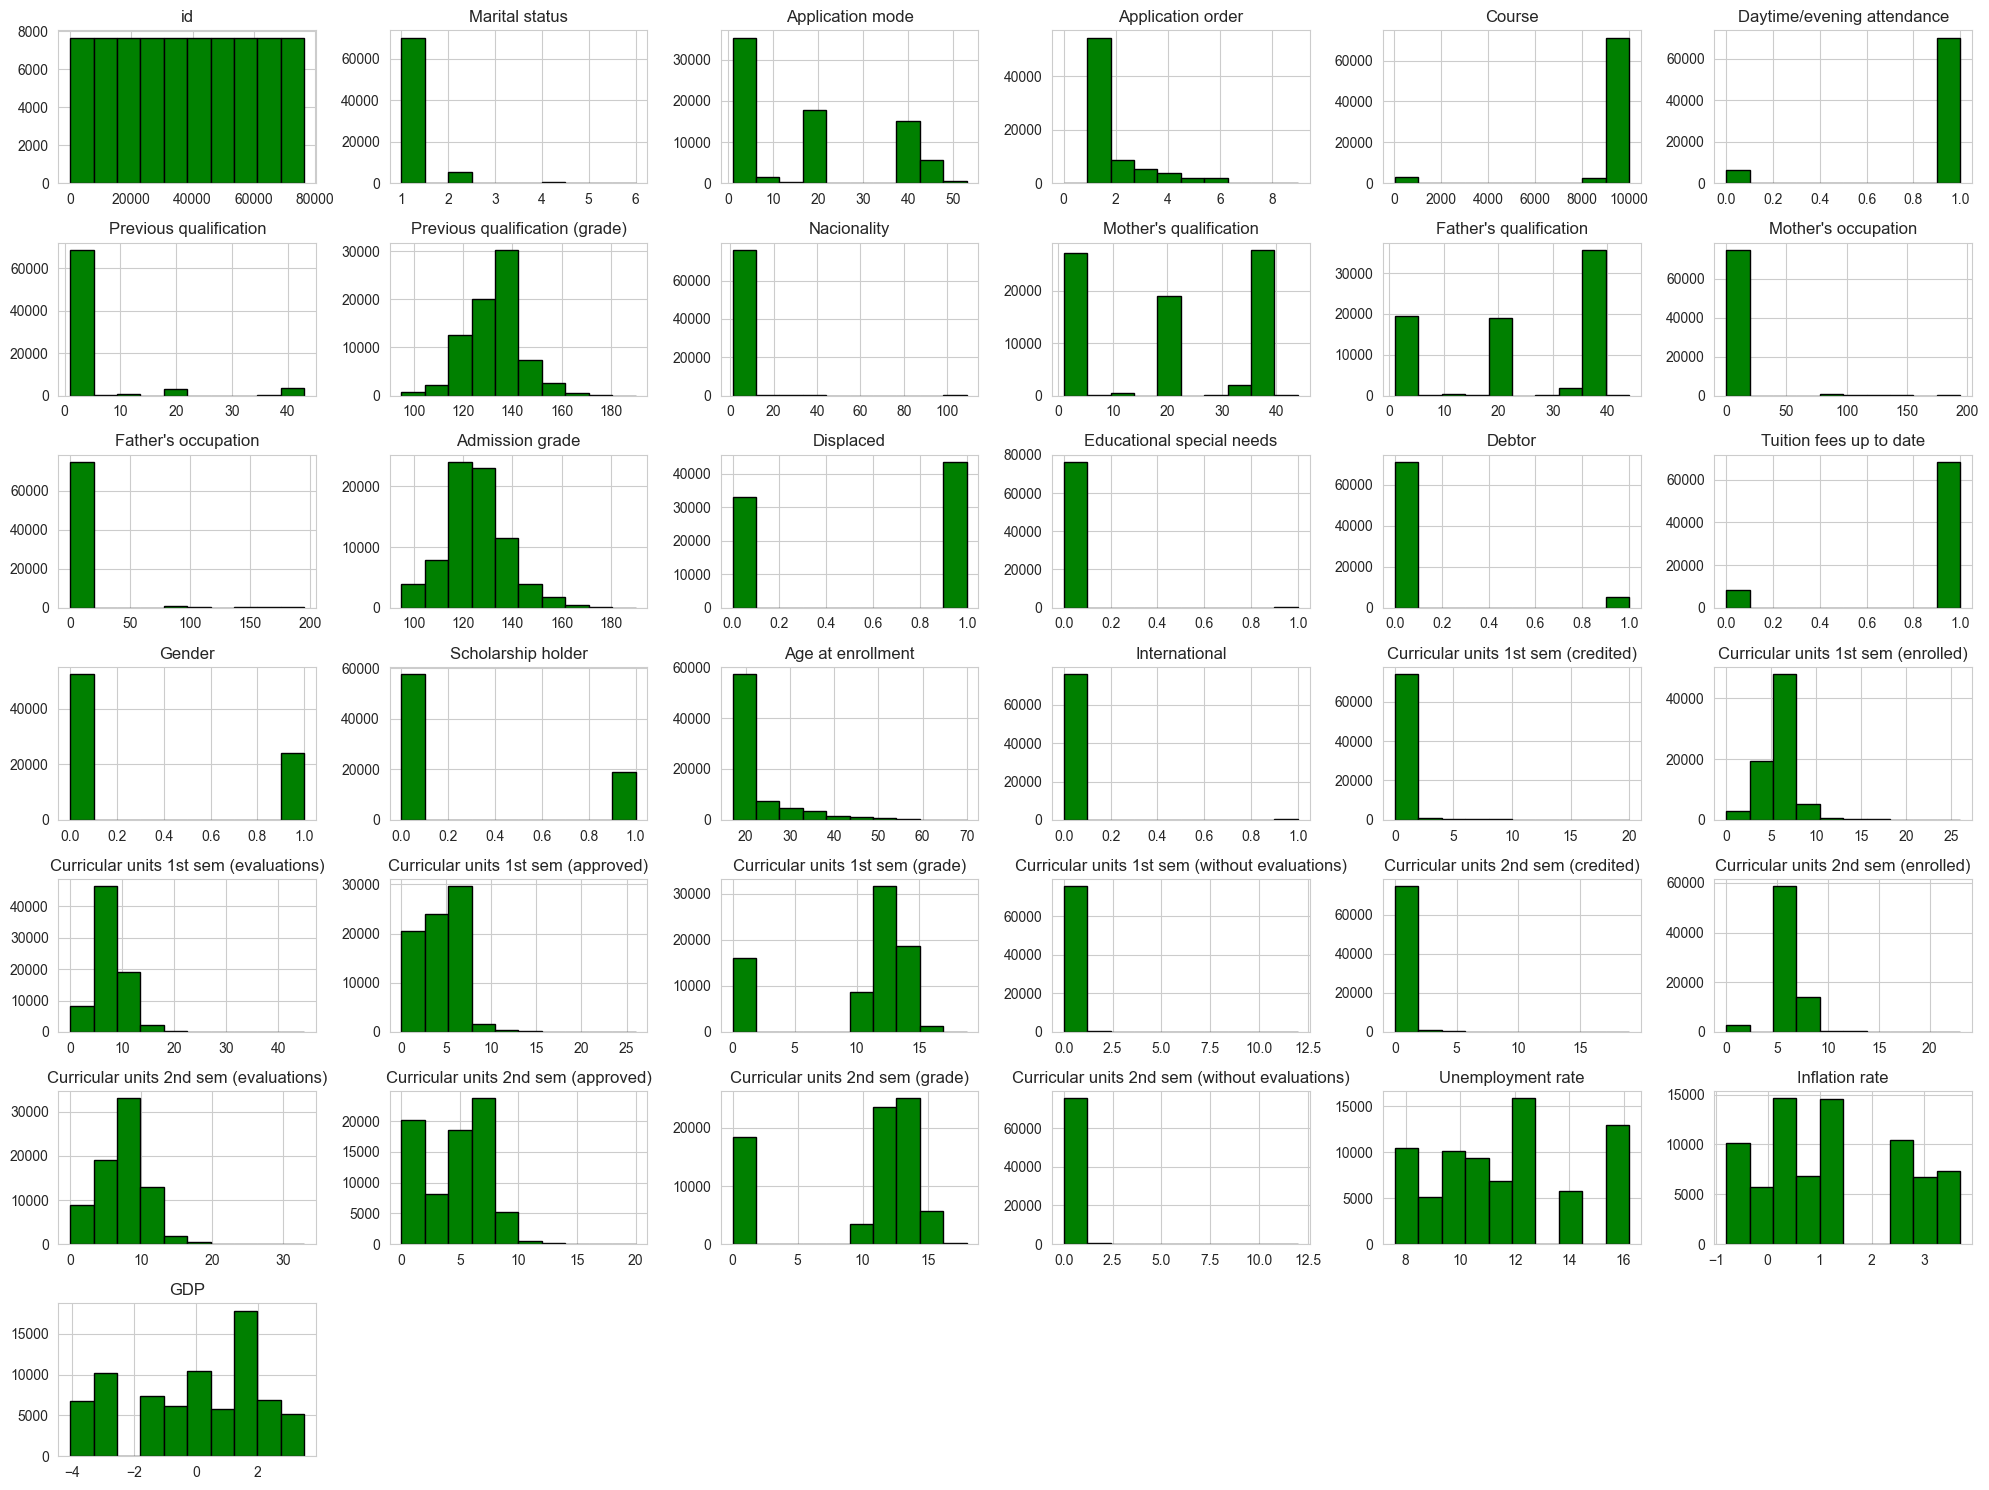

In [17]:
df_train.hist(figsize=(20, 15), color='green', edgecolor='black')
plt.gcf().set_facecolor('white')
plt.tight_layout()
plt.show()

In [28]:
label_encoder = LabelEncoder()
df_train['Target'] = label_encoder.fit_transform(df_train['Target'])

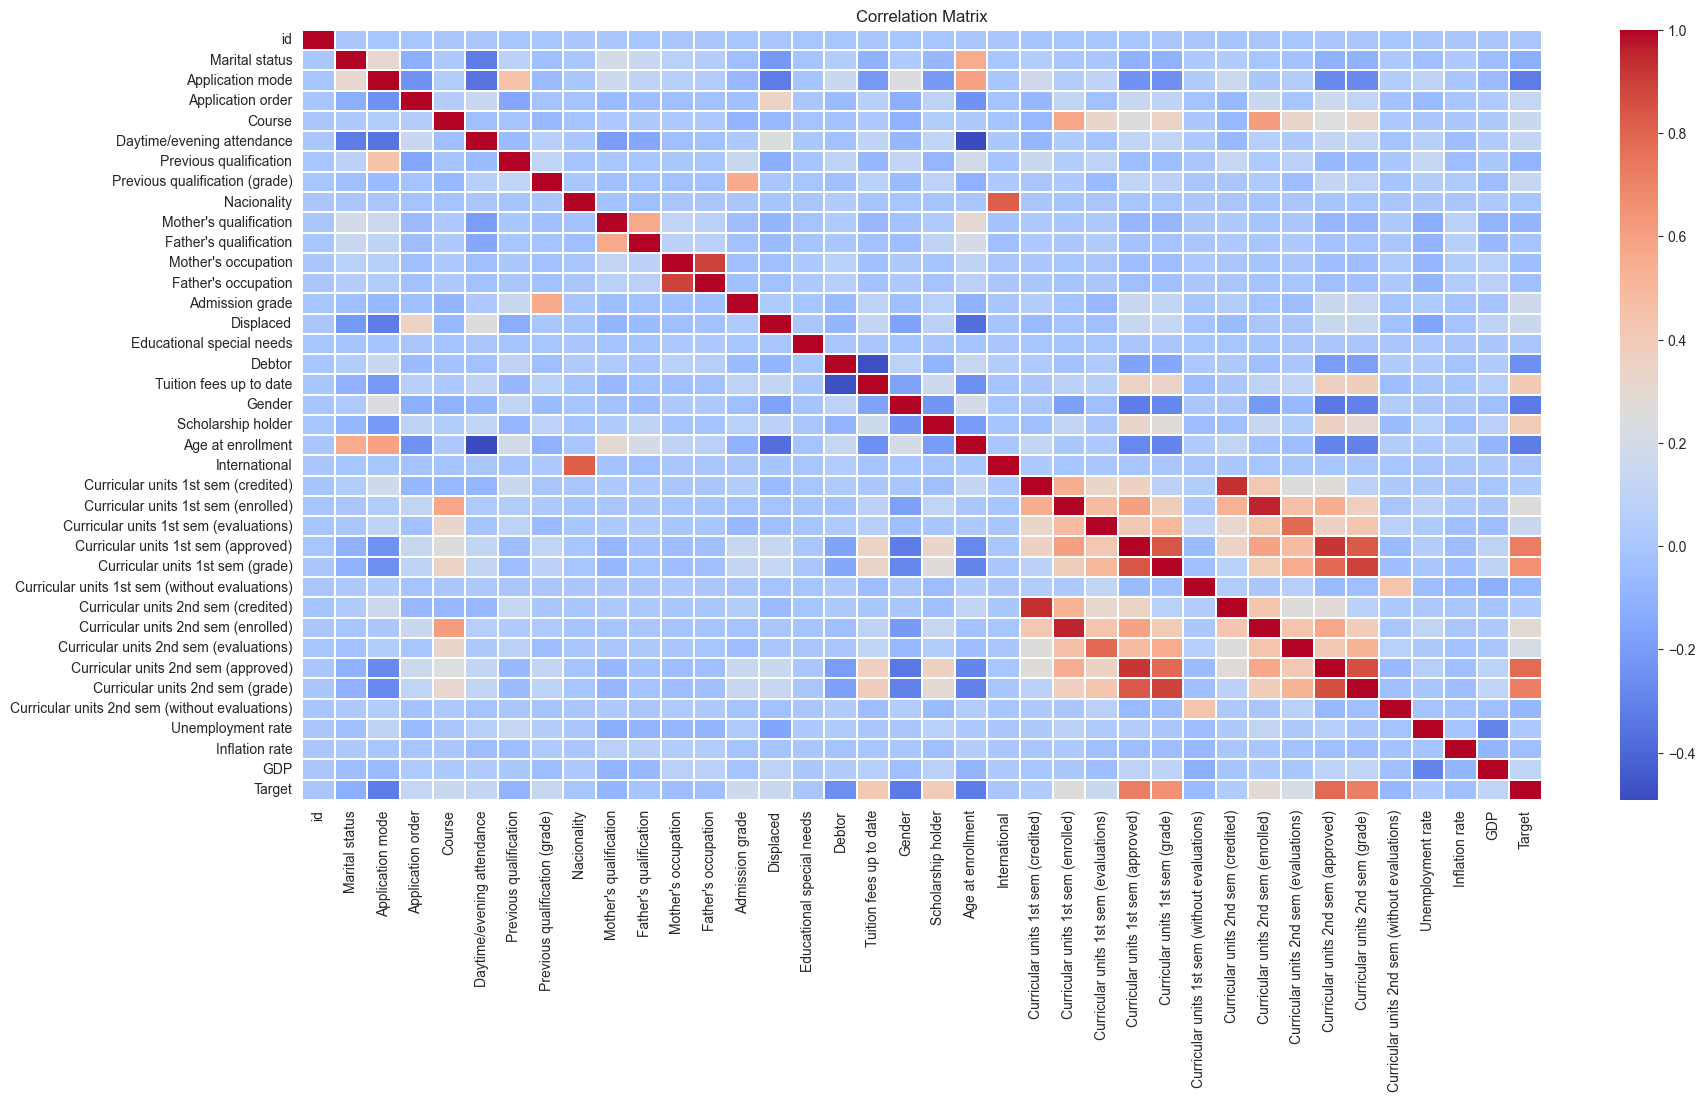

In [19]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".1f", linewidths=0.1)
#plt.gcf().set_facecolor('skyblue')
plt.title('Correlation Matrix')
plt.show()

In [20]:
df_test.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [42]:
df_train = pd.read_csv('C:\\Users\\RAIDER\\Documents\\2025-11-06-testCode\\training.csv')
df_test  = pd.read_csv('C:\\Users\\RAIDER\\Documents\\2025-11-06-testCode\\testing.csv')

In [43]:
df_train.head()

Marital status  Application mode  Application order    Course  \
0       -0.252984         -0.906711          -0.525246  0.129322   
1       -0.252984          0.051062          -0.525246  0.129322   
2       -0.252984          0.051062           0.284497  0.138244   
3       -0.252984         -0.906711           1.094240  0.275434   
4       -0.252984         -0.906711           0.284497  0.275434   

   Daytime/evening attendance  Previous qualification  \
0                           1               -0.309314   
1                           1               -0.309314   
2                           1               -0.309314   
3                           1               -0.309314   
4                           1               -0.309314   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                       -0.577039     -0.06757               -1.224501   
1                       -0.667669     -0.06757               -0.055689   
2                        0.419887     -0.06757               -1.094633   
3                       -0.123891     -0.06757               -0.055689   
4                       -0.033261     -0.06757               -0.055689   

   Father's qualification  ...  Curricular units 2nd sem (enrolled)  \
0               -0.296861  ...                             0.031971   
1               -0.296861  ...                             0.031971   
2               -0.296861  ...                             0.031971   
3               -1.369240  ...                             1.251583   
4                0.909564  ...                             0.641777   

   Curricular units 2nd sem (evaluations)  \
0                               -0.079416   
1                                0.492796   
2                               -2.082156   
3                                1.065007   
4                                1.351113   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                             0.708791                          0.498469   
1                            -1.454502                         -1.754247   
2                            -1.454502                         -1.754247   
3                             1.069340                          0.569417   
4                             0.708791                          0.589959   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                       -0.138201          -0.159068   
1                                       -0.138201          -0.159068   
2                                       -0.138201           1.763404   
3                                       -0.138201          -0.159068   
4                                       -0.138201          -1.478411   

   Inflation rate       GDP    Target  Unempl_Infl_GDP  
0       -0.448927  0.932576  Graduate          13.4532  
1       -0.448927  0.932576   Dropout          13.4532  
2       -0.663244 -0.372850   Dropout          -4.4712  
3       -0.448927  0.932576  Enrolled          13.4532  
4        0.979854  0.177738  Graduate           6.3232  

[5 rows x 38 columns]

In [44]:
from scipy.stats import skew

def handle_skewed_columns(df):
    numerical_features = df.select_dtypes(include=[np.number])
    skewness = numerical_features.apply(lambda x: skew(x.dropna()))
    skewed_features = skewness[abs(skewness) > 1]

    for col in skewed_features.index:
        if df[col].min() > -1:
            df[f'{col}_log'] = np.log1p(df[col])
    return df


def add_curriculum_interaction_features(df):
    df['Curriculum_interaction_1st_sem'] = df['Curricular units 1st sem (credited)'] * df['Curricular units 1st sem (enrolled)'] * df['Curricular units 1st sem (evaluations)'] * df['Curricular units 1st sem (approved)']
    df['Curriculum_interaction_2nd_sem'] = df['Curricular units 2nd sem (credited)'] * df['Curricular units 2nd sem (enrolled)'] * df['Curricular units 2nd sem (evaluations)'] * df['Curricular units 2nd sem (approved)']

def add_grade_interaction_features(df):
    df['Grade_interaction_1st_sem'] = df['Admission grade'] * df['Curricular units 1st sem (grade)']
    df['Grade_interaction_2nd_sem'] = df['Admission grade'] * df['Curricular units 2nd sem (grade)']

def add_age_interaction_features(df):
    df['Age_interaction'] = df['Age at enrollment'] * df['Previous qualification (grade)']

def add_economic_interaction_features(df):
    df['Economic_interaction_add'] = df['Unemployment rate'] + df['Inflation rate'] + df['GDP']
    #df['Economic_interaction_sub'] = df['Unemployment rate'] - df['Inflation rate'] - df['GDP']
    #df['Economic_interaction_div1'] = df['Unemployment rate'] / (df['Inflation rate'] + 1e-6)
    #df['Economic_interaction_div2'] = df['Inflation rate'] / (df['GDP'] + 1e-6)
    #df['Economic_interaction_div3'] = df['GDP'] / (df['Unemployment rate'] + 1e-6)
    #df['Economic_interaction_comb1'] = (df['Unemployment rate'] + df['Inflation rate']) * df['GDP']
    #df['Economic_interaction_comb2'] = (df['Unemployment rate'] * df['Inflation rate']) + df['GDP']
    df['Economic_interaction_exp1'] = df['Unemployment rate'] * df['Inflation rate']
    df['Economic_interaction_exp2'] = df['GDP'] * df['Unemployment rate']
    df['Economic_interaction_exp3'] = df['GDP'] * df['Inflation rate']
    #df['Economic_interaction_log1'] = np.log1p(df['Unemployment rate']) + np.log1p(df['Inflation rate']) + np.log1p(df['GDP'])
    #df['Economic_interaction'] = (df['Unemployment rate'] * df['Inflation rate'] * df['GDP'])
    #df['Economic_interaction_sqrt1'] = np.sqrt(df['Unemployment rate']) + np.sqrt(df['Inflation rate']) + np.sqrt(df['GDP'])
   # df['Economic_interaction_sqrt2'] = np.sqrt(df['Unemployment rate'] * df['Inflation rate'] * df['GDP'])
    #df['Economic_interaction_poly1'] = df['Unemployment rate']**2 + df['Inflation rate']**2 + df['GDP']**2
    #df['Economic_interaction_poly2'] = (df['Unemployment rate'] * df['Inflation rate']) + (df['Inflation rate'] * df['GDP']) + (df['GDP'] * df['Unemployment rate'])
    return df



def add_qualification_interaction_features(df):
    df['Qualification_interaction'] = df['Previous qualification'] * df['Admission grade']
    df['Course_interaction'] = df['Previous qualification'] * df['Course']

def add_occupation_interaction_features(df):
    df["Occupation_interaction"] = df["Mother's occupation"] * df["Father's occupation"]

def add_enrollment_evaluation_interaction_features(df):
    df['Enrollment_evaluation_interaction_1st_sem'] = df['Curricular units 1st sem (enrolled)'] * df['Curricular units 1st sem (evaluations)']
    df['Enrollment_evaluation_interaction_2nd_sem'] = df['Curricular units 2nd sem (enrolled)'] * df['Curricular units 2nd sem (evaluations)']

def add_gender_marital_interaction_features(df):
    df['Gender_marital_interaction'] = df['Gender'] * df['Marital status']

def add_tuition_scholarship_interaction_features(df):
    df['Tuition_scholarship_interaction'] = df['Tuition fees up to date'] * df['Scholarship holder']

def feature_engineer_train(df_train):
    #df_train = handle_skewed_columns(df_train)

    #add_curriculum_interaction_features(df_train)
    #add_grade_interaction_features(df_train)
    #add_age_interaction_features(df_train)
    add_economic_interaction_features(df_train)
    #add_qualification_interaction_features(df_train)
    #add_occupation_interaction_features(df_train)
   # add_enrollment_evaluation_interaction_features(df_train)
    #add_gender_marital_interaction_features(df_train)
    #add_tuition_scholarship_interaction_features(df_train)
    return df_train

def feature_engineer_test(df_test):
    #df_test = handle_skewed_columns(df_test)

    #add_curriculum_interaction_features(df_test)
    #add_grade_interaction_features(df_test)
    #add_age_interaction_features(df_test)
    add_economic_interaction_features(df_test)
    #add_qualification_interaction_features(df_test)
    #add_occupation_interaction_features(df_test)
    #add_enrollment_evaluation_interaction_features(df_test)
    #add_gender_marital_interaction_features(df_test)
    #add_tuition_scholarship_interaction_features(df_test)
    return df_test

In [ ]:
#df_train = feature_engineer_train(df_train)
#df_test = feature_engineer_test(df_test)

In [45]:
def add_interaction_features(df):
    df['Application_mode_x_Application_order'] = df['Application mode'] * df['Application order']
    df['Course_x_Curricular_units_1st_sem_enrolled'] = df['Course'] * df['Curricular units 1st sem (enrolled)']
    df['Daytime_evening_attendance_x_Age_at_enrollment'] = df['Daytime/evening attendance'] * df['Age at enrollment']
    df['Previous_qualification_grade_x_Admission_grade'] = df['Previous qualification (grade)'] * df['Admission grade']
    df['Displaced_x_Curricular_units_1st_sem_approved'] = df['Displaced'] * df['Curricular units 1st sem (approved)']
    df['Scholarship_holder_x_Tuition_fees_up_to_date'] = df['Scholarship holder'] * df['Tuition fees up to date']
    df['Curricular_units_1st_sem_approved_x_Curricular_units_2nd_sem_approved'] = df['Curricular units 1st sem (approved)'] * df['Curricular units 2nd sem (approved)']
    #df['Unemployment_rate_x_Inflation_rate'] = df['Unemployment rate'] * df['Inflation rate']
    return df

In [ ]:
#df_train = add_interaction_features(df_train)
#df_test = add_interaction_features(df_test)

In [46]:
df_train.shape

(80942, 38)

In [ ]:
#df_train.to_csv('trainfeature.csv',index=False)
#df_test.to_csv('testfeature.csv',index=False)

In [47]:
df_train['Target']

0        Graduate
1         Dropout
2         Dropout
3        Enrolled
4        Graduate
           ...   
80937    Graduate
80938     Dropout
80939     Dropout
80940    Graduate
80941    Graduate
Name: Target, Length: 80942, dtype: object

In [48]:
label_encoder = LabelEncoder()
df_train['Target'] = label_encoder.fit_transform(df_train['Target'])
#y = label_encoder.fit_transform(y)

In [49]:
y = df_train['Target']
df_train = df_train.drop(['Target'],axis=1)
#df_train = df_train_cleaned

In [50]:
train = df_train

In [51]:
df_test1 =df_test

In [56]:
from lightgbm import early_stopping, log_evaluation
lgb_params1 = {"boosting_type": "gbdt","objective": "multiclass","metric": "multi_logloss", 'num_class':3,
                         'n_estimators': 1024,
                         'reg_alpha': 0.1, 'reg_lambda': 10,
                         'colsample_bytree': 0.8, 'subsample': 0.8,
                         'learning_rate': 0.05, 'num_leaves': 64, 'min_child_samples': 62,
                         'max_bin':245, "extra_trees": True,
                    }

lgb_params2 = {"boosting_type": "gbdt","objective": "multiclass","metric": "multi_logloss", 'num_class':3,
     'n_estimators': 1024,
     'reg_alpha': 2.6756579164398144, 'reg_lambda': 1.6187614490530422,
     'colsample_bytree': 0.7, 'subsample': 0.7,
     'learning_rate': 0.030479973315991688, 'num_leaves': 50, 'min_child_samples': 62,
     'max_bin':245,
}



lgb_params3 = {'n_estimators': 8000,
          'num_class': 3,
          'boosting_type': 'gbdt',
          'objective': 'multiclass',
          'metric': 'multi_logloss',
          'verbosity': -1,
          'random_state': 99,
          'reg_alpha': 1.7878527151970849,
          'reg_lambda': 1.391543710164331,
          'colsample_bytree': 0.5,
          'subsample': 0.5,
          'learning_rate': 0.04,
          'max_depth': 20,
          'num_leaves': 70,
          'min_child_samples': 40,
          'min_data_per_groups': 16
         }

n_splits = 10
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


lgbm_predictions1 = np.zeros(len(train))
lgbm_predictions2 = np.zeros(len(train))
lgbm_predictions3 = np.zeros(len(train))

lgbm_test_predictions1 = np.zeros((len(df_test1), len(np.unique(y))))
lgbm_test_predictions2 = np.zeros((len(df_test1), len(np.unique(y))))
lgbm_test_predictions3 = np.zeros((len(df_test1), len(np.unique(y))))

num_classes = len(np.unique(y))

def train_predict(params, train, y, df_test1, n_splits, kf):
    fold_predictions = np.zeros(len(train))
    fold_test_predictions = np.zeros((len(df_test1), num_classes))
    feature_importances = np.zeros(train.shape[1])

    for fold, (train_idx, val_idx) in enumerate(kf.split(train, y)):
        X_train, X_val = train.iloc[train_idx], train.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        lgbm_model = LGBMClassifier(**params)

        lgbm_model.fit(X_train, y_train,
                       eval_set=[(X_val, y_val)],
                       callbacks=[early_stopping(50), log_evaluation(100)]
                       )

        lgbm_fold_preds = lgbm_model.predict(X_val)
        lgbm_fold_test_preds = lgbm_model.predict_proba(df_test1)

        fold_predictions[val_idx] = lgbm_fold_preds
        fold_test_predictions += lgbm_fold_test_preds / n_splits

        feature_importances += lgbm_model.feature_importances_

    return fold_predictions, fold_test_predictions, feature_importances

In [57]:
preds3, test_preds3, feat_imports3 = train_predict(lgb_params3, train, y, df_test1, n_splits, kf)

ensemble_train_preds3 = np.array([preds3]).T
ensemble_train_preds3 = mode(ensemble_train_preds3, axis=1).mode.flatten()

ensemble_test_preds3 = (test_preds3)

ensemble_test_preds_labels3 = np.argmax(ensemble_test_preds3, axis=1)

overall_metric_lgbm = accuracy_score(y, ensemble_train_preds3)
print("Overall Accuracy (Ensemble LGBM):", overall_metric_lgbm)

Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 0.456385
[200]	valid_0's multi_logloss: 0.443403
[300]	valid_0's multi_logloss: 0.440785
[400]	valid_0's multi_logloss: 0.440031
Early stopping, best iteration is:
[407]	valid_0's multi_logloss: 0.439924
Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 0.437542
[200]	valid_0's multi_logloss: 0.424452
[300]	valid_0's multi_logloss: 0.421388
[400]	valid_0's multi_logloss: 0.420145
[500]	valid_0's multi_logloss: 0.419586
Early stopping, best iteration is:
[502]	valid_0's multi_logloss: 0.419559
Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 0.440568
[200]	valid_0's multi_logloss: 0.425828
[300]	valid_0's multi_logloss: 0.42165
[400]	valid_0's multi_logloss: 0.420313
[500]	valid_0's multi_logloss: 0.419996
[600]	valid_0's multi_logloss: 0.419919
Early stopping, best iteration is:
[579]	valid_0's multi_logloss: 0.

In [54]:
import lightgbm as lgb
print(lgb.__version__)

4.6.0


In [58]:
def new_stars(df_train,y,df_test,params):

    n_split=10
    test_preds = np.zeros((len(df_test),3))
    val_preds = np.zeros((len(df_train),3))

    cv = KFold(n_split, shuffle=True, random_state=42)

    for fold, (train_ind, valid_ind) in enumerate(cv.split(df_train,y)):

        X_train, X_val = train.iloc[train_ind], train.iloc[valid_ind]
        y_train, y_val = y.iloc[train_ind], y.iloc[valid_ind]


        model = lgb.LGBMClassifier(**params)
        model.fit(X_train, y_train,
                    eval_set=[(X_val, y_val)],
                    callbacks=[lgb.early_stopping(stopping_rounds=45)])

        y_pred_trn=model.predict_proba(X_train)
        y_pred_val=model.predict_proba(X_val)
        test_preds += model.predict_proba(df_test1)/n_split
        val_preds[valid_ind] = model.predict_proba(X_val)


    return val_preds, test_preds

In [59]:
val_preds, test_preds=new_stars(train,y,df_test1,lgb_params3)

Training until validation scores don't improve for 45 rounds
Early stopping, best iteration is:
[466]	valid_0's multi_logloss: 0.428405
Training until validation scores don't improve for 45 rounds
Early stopping, best iteration is:
[390]	valid_0's multi_logloss: 0.418458
Training until validation scores don't improve for 45 rounds
Early stopping, best iteration is:
[500]	valid_0's multi_logloss: 0.42304
Training until validation scores don't improve for 45 rounds
Early stopping, best iteration is:
[526]	valid_0's multi_logloss: 0.433074
Training until validation scores don't improve for 45 rounds
Early stopping, best iteration is:
[437]	valid_0's multi_logloss: 0.438456
Training until validation scores don't improve for 45 rounds
Early stopping, best iteration is:
[358]	valid_0's multi_logloss: 0.443647
Training until validation scores don't improve for 45 rounds
Early stopping, best iteration is:
[405]	valid_0's multi_logloss: 0.422204
Training until validation scores don't improve fo

In [60]:
val_preds_out = np.argmax(val_preds, axis=1)
accuracy_score(y,val_preds_out)

0.832707370709891

In [61]:
y_test=np.argmax(test_preds, axis=1)
y_test

array([0, 2, 2, ..., 0, 0, 0], dtype=int64)

In [62]:
ypred = ensemble_test_preds_labels3*0.6+y_test*0.4#+#ensemble_test_preds_labels2*0.025+ensemble_test_preds_labels1*0.025)

In [63]:
classi = np.round(ypred).astype(int)
categorical_predictions = label_encoder.inverse_transform(classi)

In [64]:
categorical_predictions

array(['Dropout', 'Graduate', 'Graduate', ..., 'Dropout', 'Dropout',
       'Dropout'], dtype=object)

In [65]:
df_sub['Target'] =categorical_predictions

In [66]:
df_sub.head()

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Graduate
4  76522  Enrolled

In [67]:
df_sub.to_csv('submission.csv', index=False)

In [68]:
df_sub['Target'].value_counts()

Target
Graduate    26410
Dropout     15371
Enrolled     9231
Name: count, dtype: int64

<Axes: >

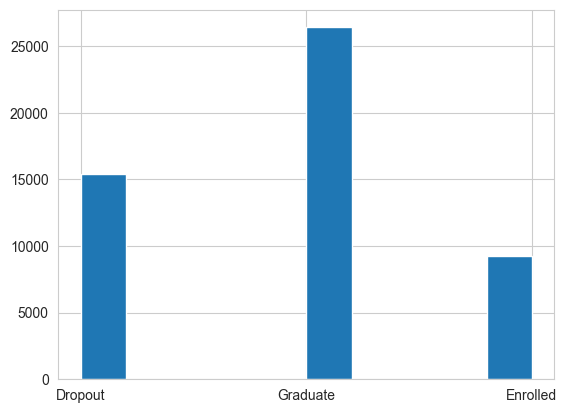

In [69]:
df_sub['Target'].hist()